# Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import graphviz
import mglearn as mglearn
import mglearn.plots
import mglearn.datasets
import matplotlib.pyplot as plt
# ensures plots are inlined for the notebook presentation
%matplotlib inline 
import scipy as sp
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, ward
import time
from IPython.display import display
import seaborn as sns
import os
import tensorflow as tf

In [2]:
# Sci-Kit Imports
import sklearn as sklearn
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

import sklearn.datasets as datasets
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
# from sklearn.datasets import load_breast_cancer
# from sklearn.datasets import fetch_lfw_people
# from sklearn.datasets import load_digits
# from sklearn.datasets import make_moons
# from sklearn.datasets import make_circles
from sklearn.datasets import load_wine

In [3]:
# Mute warnings
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# warnings.simplefilter(action='ignore', category=WARNING)

# Generate random data, create 3 clusters, apply algorithms

In [4]:
# generate some random cluster data 
X, y = make_blobs(random_state = 505, n_samples = 500) 
rng = np.random.RandomState(321) 

Text(0, 0.5, 'Feature 1')

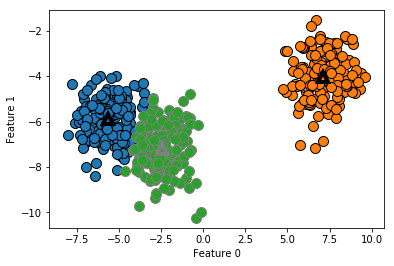

In [5]:
# KMmeans cluster the data into three clusters 
kmeans = KMeans(n_clusters = 3) 
kmeans.fit(X) 
kmeans.predict(X)

# KMeans plot the cluster assignments and cluster centers 
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, 
                         markers ='o')
mglearn.discrete_scatter( 
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], [0, 1, 2], 
    markers ='^', markeredgewidth = 4) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")

In [6]:
# Agglomerative Clustering with Dendrogram plot

# from sklearn.datasets import make_blobs 
# make synthetic data 
X_blob, y_blob = make_blobs(random_state=321, n_samples=15)

Text(0, 0.5, 'Cluster distance')

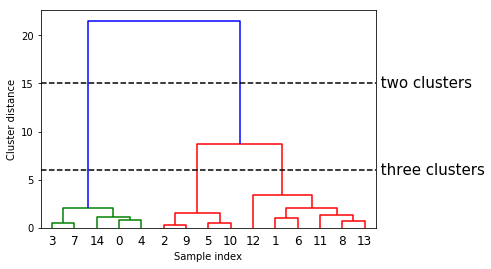

In [7]:
# Import the dendrogram function and the ward clustering function from SciPy
# from scipy.cluster.hierarchy import dendrogram, ward
# Apply the ward clustering to the data array
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X_blob)

# Plot the dendrogram for the linkage_array containing the distancesbetween clusters
dendrogram(linkage_array)

# marke the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [15, 15], '--', c='k')
ax.plot(bounds, [6, 6], '--', c='k')
ax.text(bounds[1], 15, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 6, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

In [8]:
# Apply DBSCAN to synthetic data set

# from sklearn.datasets import make_blobs 
# make synthetic data 
X_blob, y_blob = make_blobs(random_state=321, n_samples=150)

Text(0, 0.5, 'Feature 1')

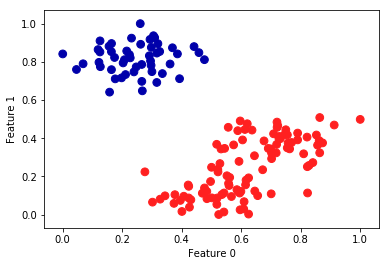

In [9]:
# import numpy as np
# import mglearn as mglearn
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.cluster import DBSCAN

# rescale the data to zero mean and unit variance
MMscaler = MinMaxScaler()
MMscaler.fit(X_blob)
X_scaled_MM = MMscaler.transform(X_blob)

# apply DBSCAN with decreased eps below default (0.5) to define clusters
dbscan = DBSCAN(eps=0.3, min_samples=35)
clusters = dbscan.fit_predict(X_scaled_MM)

# plot the cluster assignments
plt.scatter(X_scaled_MM[:, 0], X_scaled_MM[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Use PCA for dimensionality reduction on Wine data set

In [10]:
# Load Wine data set, binarize and train test split
# from sklearn.datasets import load_wine
from sklearn.preprocessing import label_binarize
wine = load_wine(return_X_y=False)

# Create Pandas DataFrame
wine_target = pd.DataFrame(wine.target_names, columns=['class'])
wine_features = pd.DataFrame(wine.data, columns=wine.feature_names)

wine_target_binarize = label_binarize(wine_target, classes=[0,1,2])
n_classes = 3

wine_features, wine_target_binarize = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(wine_features, wine_target_binarize, 
                                                    test_size=0.30, random_state=321)

In [11]:
## Apply Standard Scalar to Wine data set for preprocessing

# from sklearn.preprocessing import StandardScaler
# It is important to apply exact same transformation to training and test sets
# preprocessing using zero mean and unit variance scaling - StandardScaler
# scale data using StandardScaler
SSscaler = StandardScaler() 
 
# Efficiently calling fit and transform on training and test set
X_train_scaled= SSscaler.fit_transform(X_train)
X_test_scaled= SSscaler.fit_transform(X_test)

In [12]:
## USING STANDARD SCALAR ON PCA

# Use pipeline for PCA and application of algorithm for further dimensionality reduction
# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.decomposition import PCA
# from sklearn.pipeline import make_pipeline
# from sklearn.tree import DecisionTreeClassifier

# Fit to data and predict using pipelined PCA, 
# and DecisionTreeClassifier for additional dimensionality reduction
dt_clf = make_pipeline(PCA(n_components=3), DecisionTreeClassifier(random_state=321))
dt_clf.fit(X_train_scaled, y_train)
pred_X_train = dt_clf.predict(X_train_scaled)
pred_X_test = dt_clf.predict(X_test_scaled)


print('\nPrediction accuracy for scaled train data with StandardScalar and PCA')
print('{:.2%}'.format(metrics.accuracy_score(pred_X_train, y_train)))
print('Prediction accuracy for scaled test data with StandardScalar and PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(pred_X_test, y_test)))


print("Training set R^2 score: {:.2f}".format(dt_clf.score(X_train_scaled, y_train))) 
print("Test set R^2 score: {:.2f}".format(dt_clf.score(X_test_scaled, y_test)))


Prediction accuracy for scaled train data with StandardScalar and PCA
100.00%
Prediction accuracy for scaled test data with StandardScalar and PCA
85.19%

Training set R^2 score: 1.00
Test set R^2 score: 0.85


In [13]:
## Apply MinMaxScalar to Wine data set for preprocessing

# from sklearn.preprocessing import MinMaxScaler
# It is important to apply exact same transformation to training and test sets
# Computes the Min and Max falue of each feature
# scale data using MinMaxScaler
MMscaler = MinMaxScaler() 
 
# Efficiently calling fit and transform on training and test set
X_train_scaled= MMscaler.fit_transform(X_train)
X_test_scaled= MMscaler.fit_transform(X_test)

In [14]:
## USING MIN_MAX_SCALAR ON PCA <<--MORE ACCURATE

# Use pipeline for PCA and application of algorithm for further dimensionality reduction
# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.decomposition import PCA
# from sklearn.pipeline import make_pipeline
# from sklearn.tree import DecisionTreeClassifier

# Fit to data and predict using pipelined PCA, 
# and DecisionTreeClassifier for additional dimensionality reduction
dt_clf = make_pipeline(PCA(n_components=3), DecisionTreeClassifier(random_state=321))
dt_clf.fit(X_train_scaled, y_train)
pred_X_train = dt_clf.predict(X_train_scaled)
pred_X_test = dt_clf.predict(X_test_scaled)

print('\nPrediction accuracy for scaled train data with StandardScalar and PCA')
print('{:.2%}'.format(metrics.accuracy_score(pred_X_train, y_train)))
print('Prediction accuracy for scaled test data with StandardScalar and PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(pred_X_test, y_test)))

print("Training set R^2 score: {:.2f}".format(dt_clf.score(X_train_scaled, y_train))) 
print("Test set R^2 score: {:.2f}".format(dt_clf.score(X_test_scaled, y_test)))

print('\nMinMaxScalar Appears to be more accurate than using StandardScalar')


Prediction accuracy for scaled train data with StandardScalar and PCA
100.00%
Prediction accuracy for scaled test data with StandardScalar and PCA
90.74%

Training set R^2 score: 1.00
Test set R^2 score: 0.91

MinMaxScalar Appears to be more accurate than using StandardScalar


# Iris data set - K-Means clustering and other Algorithms

In [15]:
import sklearn.datasets as datasets
from sklearn.datasets import load_iris
iris = load_iris()

#Tran, test, split data set
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state = 321)

Text(0, 0.5, 'Feature 1')

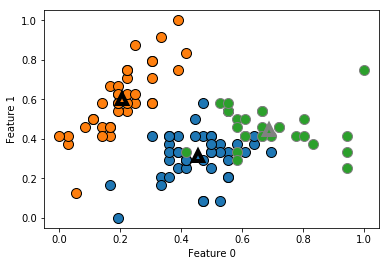

In [16]:
# KMmeans - three clusters 

# MinMaxScalar fit and transform on training and test set
MMscaler = MinMaxScaler() 
X_train_scaled = MMscaler.fit_transform(X_train)
X_test_scaled = MMscaler.fit_transform(X_test)

# K-Means fit on training and test set
kmeans = KMeans(n_clusters = 3).fit(X_train_scaled) 

# KMeans plot the fit cluster assignments and cluster centers 
mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], kmeans.labels_, 
                         markers ='o')  # note: algorithmassignment.labels_
mglearn.discrete_scatter( 
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], [0, 1, 2], 
    markers ='^', markeredgewidth = 4) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")

In [17]:
#K-Means predict on scaled training and test
pred_X_train = kmeans.fit_predict(X_train_scaled)
pred_X_test = kmeans.fit_predict(X_test_scaled)

# K-Means Scoring with ARI - Adjusted Rand Index Score
# won't use metrics.accuracy_score, K-Means is not a classification tool, better tested w/Rand Index

print("ARI score, train: {:.2f}".format(adjusted_rand_score(y_train, pred_X_train)))
print("ARI score, test: {:.2f}".format(adjusted_rand_score(y_test, pred_X_test)))

ARI score, train: 0.70
ARI score, test: 0.61


In [18]:
# re-load Iris and Apply DBSCAN
import sklearn.datasets as datasets
from sklearn.datasets import load_iris
iris = datasets.load_iris()

#Tran, test, split data set
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state = 321)

Estimated number of clusters: 2


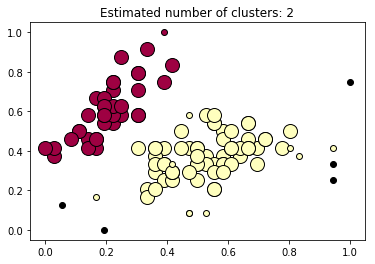

In [19]:
#Apply DBSCAN to the Iris data set to identify the three class clusters

# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.cluster import DBSCAN
# from sklearn import metrics
# import matplotlib.pyplot as plt

# rescale the data to zero mean and unit variance
MMscaler = MinMaxScaler()
X_train_scaled= MMscaler.fit_transform(X_train)
X_test_scaled= MMscaler.fit_transform(X_test)

# apply DBSCAN with decreased eps below default (0.5) to define clusters
dbscan = DBSCAN(eps=.2, min_samples=6).fit(X_train_scaled)                         
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_
                              
# DBSCAN number of clusters in labels, reducing noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)

# DBSCAN plot the cluster assignments and cluster centers 
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_train_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_train_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Text(0, 0.5, 'Feature 1')

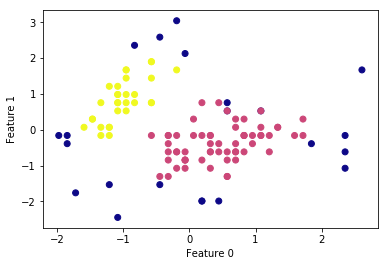

In [20]:
# Second attempt to apply DBSCAN with a visulaization to separate out three Iris classes
#Tran, test, split data set
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state = 321)

X_scaled = StandardScaler().fit_transform(X_train)
X_scaled_test = StandardScaler().fit_transform(X_test)

# cluster the data into five clusters
dbscan = DBSCAN(eps=1.0, min_samples = 25)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# After attempting two visualization methods to double-check, DBSCAN Does not 
# appear to be an ideal model to run analysis on the Iris data set as
# it proves difficult to identify the third class segmentation with the eps 
# and min_samples hyperparameter values.

In [21]:
#DBSCAN predict on scaled training and test
# true_X_train = dbscan.fit_predict(X_train)
pred_X_train = dbscan.fit_predict(X_scaled)

# true_X_test = dbscan.fit_predict(X_test)
pred_X_test = dbscan.fit_predict(X_scaled_test)

 
# DBSCAN Scoring with ARI - Adjusted Rand Index Score
# won't use metrics.accuracy_score, K-Means is not a classification tool, better tested w/Rand Index

print("ARI score, train: {:.2f}".format(adjusted_rand_score(y_train, pred_X_train)))


ARI score, train: 0.40


Text(0, 0.5, 'Feature 1')

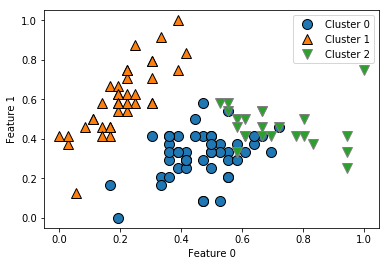

In [22]:
# Agglomerative Heirarchical clustering technique

# import matplotlib.pyplot as plt
# import numpy as np
# import mglearn as mglearn
# from sklearn.cluster import AgglomerativeClustering

# rescale the data to zero mean and unit variance
MMscaler = MinMaxScaler()
X_train_scaled= MMscaler.fit_transform(X_train)
X_test_scaled= MMscaler.fit_transform(X_test)

# Apply Agglomerative Clustering with three assigned clusters
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_train_scaled)

mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [23]:
#Agglomerative Heirarchical Clustering (AHC) predict on scaled training and test
pred_X_train = agg.fit_predict(X_train_scaled)
pred_X_test = agg.fit_predict(X_test_scaled)

# AHC Scoring with ARI - Adjusted Rand Index Score
# won't use metrics.accuracy_score, K-Means is not a classification tool, better tested w/Rand Index

print("ARI score, train: {:.2f}".format(adjusted_rand_score(y_train, pred_X_train)))
print("ARI score, test: {:.2f}".format(adjusted_rand_score(y_test, pred_X_test)))

ARI score, train: 0.70
ARI score, test: 0.61
